In [1]:
library(tidyverse)
options(repr.plot.height=4, repr.plot.width=6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


# Lecture 02: More on ``ggplot``

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**

After today's lecture you will understand how to:

* Make plots more interpretable through the use of:
  * [Position adjustments](#Position-Adjustments), 
  * [Coordinate systems](#Coordinate-Systems) 
  * [Scale transformations](#Scale-transformations)
  * [Facets](#Facets)
* Employ these ideas on a real data set.

</div>

## Millenials
Today's lecture will focus on data set released by the [Pew Research Center](https://www.pewsocialtrends.org/2010/02/24/millennials-confident-connected-open-to-change/) on ... millennials!

![millennials](https://images2.minutemediacdn.com/image/upload/c_crop,h_1189,w_2119,x_0,y_225/f_auto,q_auto,w_1100/v1561494201/shape/mentalfloss/586493-istock-862201574.jpg)

The data set we will analyze is based on a survey of about 2,000 people done in 2011:

In [21]:
load("millennials.RData")
table(mil$q20)


     Several times a day         About once a day           Every few days 
                     249                      244                      217 
             Once a week               Less often (VOL) Don't know/Refused 
                     140                      176                        1 

Each column of the data corresponds to one of the question asked during the survey. You can find the full script in the `millennials/Jan10 Millennials_Que.doc` in this folder.

## Bar charts
Many of the columns here are of type factor, meaning they are categorical. To visualize their distribution, we can use a bar chart. Question 20 is:

    Q.20	How often do you visit the social networking site you use most often… several times a day, about once a day, every few days, once a week or less often?

## Exercise
Using the `mil` table to reproduce this plot on social media usage among all respondents in the sample:

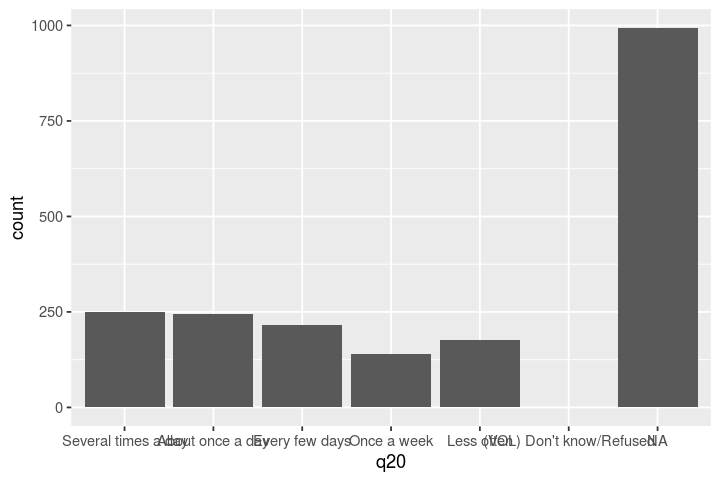

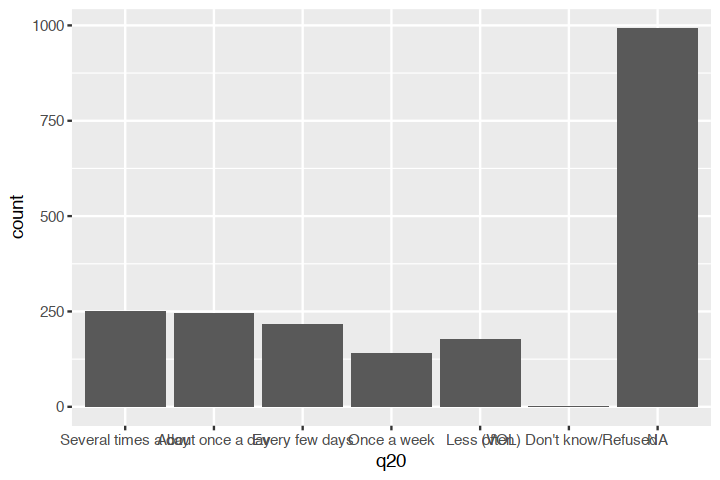

In [23]:
ggplot(data = mil) + geom_bar(mapping = aes(x=q20))

This aesthetic looks different than what we have seen before. We didn't supply a `y` variable, and the `y` variable in the plot, **count**, is not even a variable in our data set. 

So we see that a **bar chart** differs quite fundamentally from a **scatter plot**. A scatter plot uses the raw data variables directly. A bar chart applies a **statistical transformation** (`stat_count` in our case) to create the counts and then plots the counts vs the raw variable (`cut` in our case).

How do we know that `geom_bar` uses `stat_count` as the default transformation? You can type `?geom_bar` in RStudio or consult the [online documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).

Geoemetries and statistical transformations comes in pairs. E.g.,

* `geom_point` and `"identity"`
* `geom_smooth` and `stat_smooth`
* `geom_bar` and `stat_count`

These are the defaults. Although it is usually unnecessary, they can be overridden.

There are several transformations that `geom_bar` is doing internally to create the plot above. One way to generate the plot by doing explicit data transformations is as follows. Don't worry about the details; we will cover data transformations (like `select`, `group_by`, `summarise`) later.

In [39]:
q20_counts <- count(mil, q20)
q20_filtered <- filter(q20_counts, !is.na(q20))

Warning message:
“Factor `q20` contains implicit NA, consider using `forcats::fct_explicit_na`”

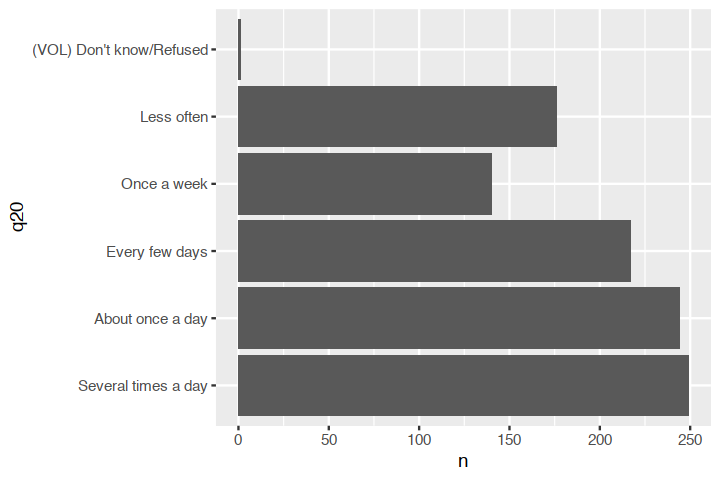

In [41]:
ggplot(data = q20_filtered) +
    geom_col(mapping = aes(x = q20, y = n)) + coord_flip()

## Coordinate Systems
One obvious way to improve the plot is to stop the labels from overlapping. To do this we can change the flip the axes of the plot using `coord_flip()`:

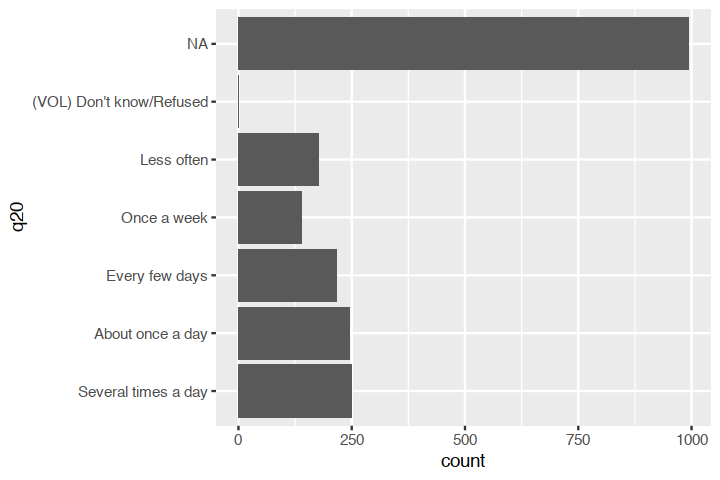

In [27]:
ggplot(mil) + geom_bar(aes(x=q20)) + coord_flip()

How else could we improve the plot?

## Position Adjustments
As we saw in the last lecture, we can use the `fill=` parameter to color the bars of a plot:

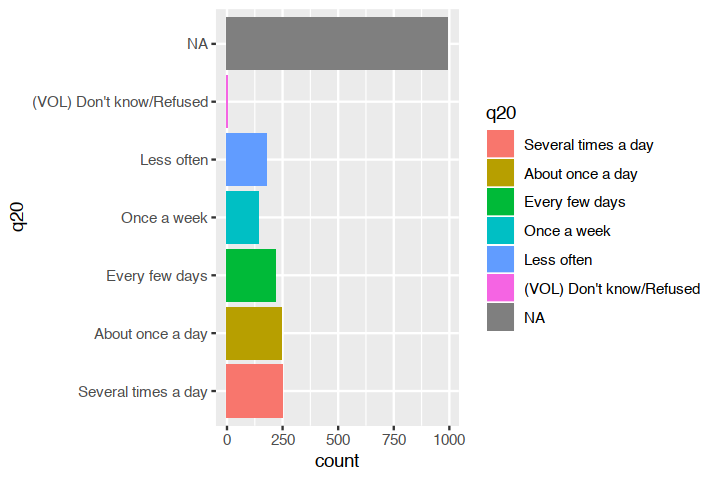

In [43]:
ggplot(data = mil) + geom_bar(mapping = aes(x = q20, fill = q20)) + coord_flip()

What happens when we map the `fill` aesthetic to some variable other than `q20`? For example, let's visualize social media usage relative to the response to the question:

    EMPLOY	How much are you employed?

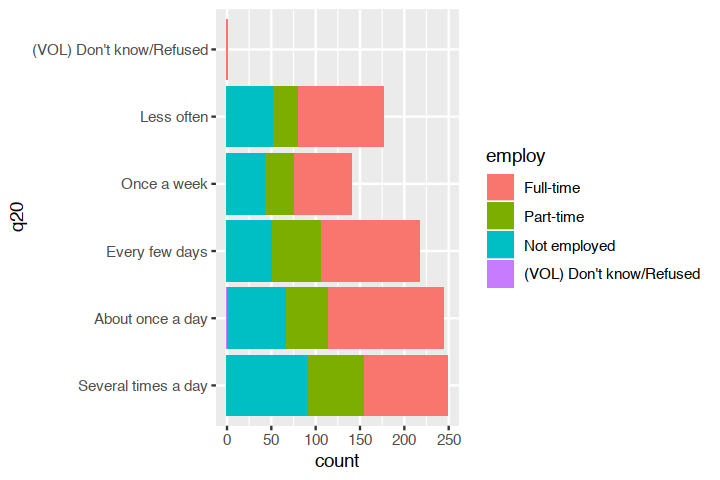

In [44]:
ggplot(data = filter(mil, !is.na(q20))) +
    geom_bar(mapping = aes(x = q20, fill = employ)) + coord_flip()

If stacking is not the behavior you want, you can set the **position** argument to something other than `"stack"`.

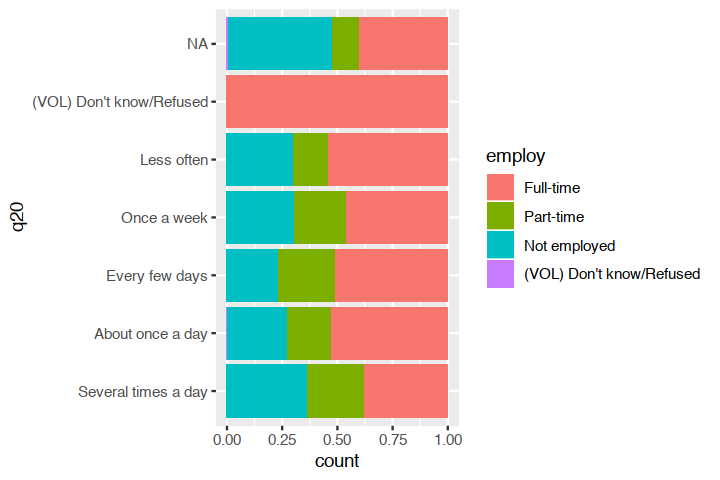

In [9]:
ggplot(data = mil) +
    geom_bar(mapping = aes(x = q20, fill = employ), 
             position = "fill") + coord_flip()

## Pie charts
We've all seen them. Here is a classic specimen I got from online:
![pie chart](https://www.mrexcel.com/img/tech-tv/t15907.jpg)

A **pie chart** is a circular chart where the angle of each wedge is proportional to the frequency of each category. Mathematically, this amounts to mapping the $y$ coordinate (height) to angle (radians). `ggplot()` lets us make pie charts, though it is not easy. (There is no `geom_pie()`.)

If I add `coord_polar()` (recall polar coordinates from calc II) to a bar chart, it starts looking like a pie chart. Let's try this with 

    Q.36	How closely do you watch the amount of money you spend?

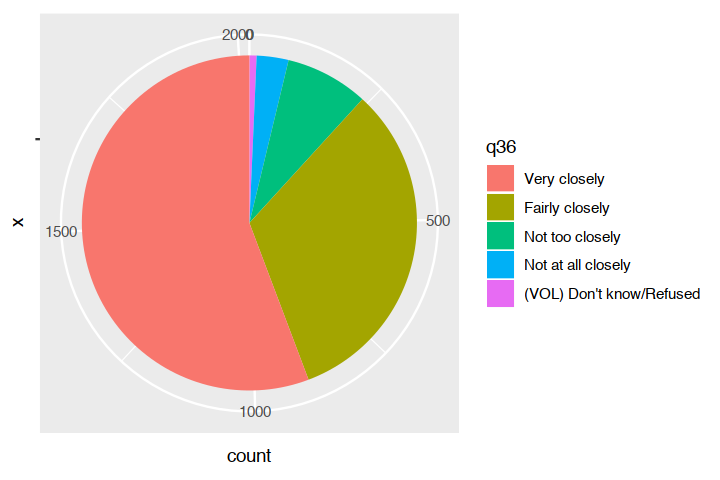

In [54]:
ggplot(mil) + geom_bar(aes(x="", fill=q36)) + coord_polar(theta="y") #

Hrm, this is not quite what we wanted. By default, it generates one "wedge" for each bar in the original graphic. 

### Exercise 
Try stacking the five categories -- `Very Closely`, ..., `Don't know/Refused` -- on top of each other using a single bar, and then calling `coord_polar`.
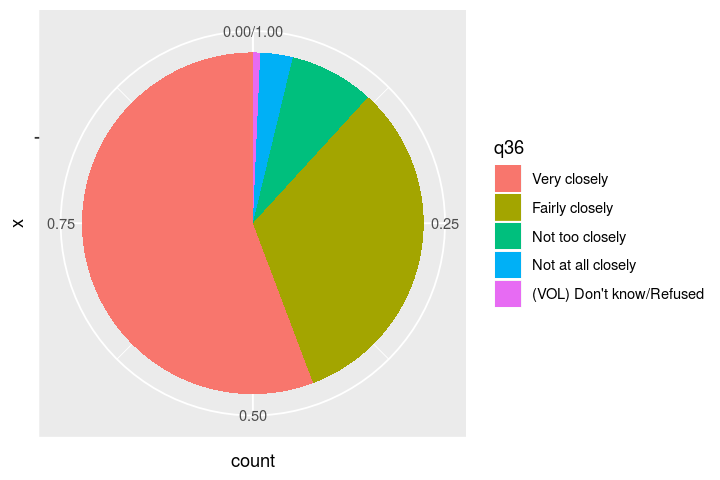

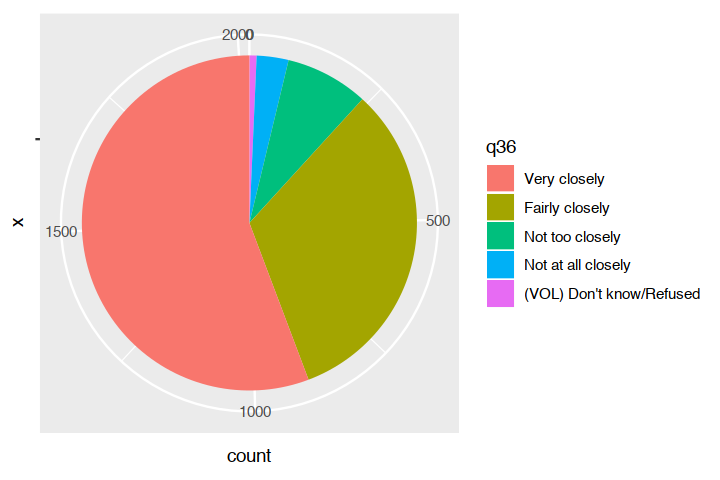

In [55]:
ggplot(mil) + geom_bar(aes(x="", fill=q36)) + coord_polar(theta="y") #

### The case against pie charts

Many people think you should not use pie charts. The left-hand circle has unit area. How many times larger is the second circle?
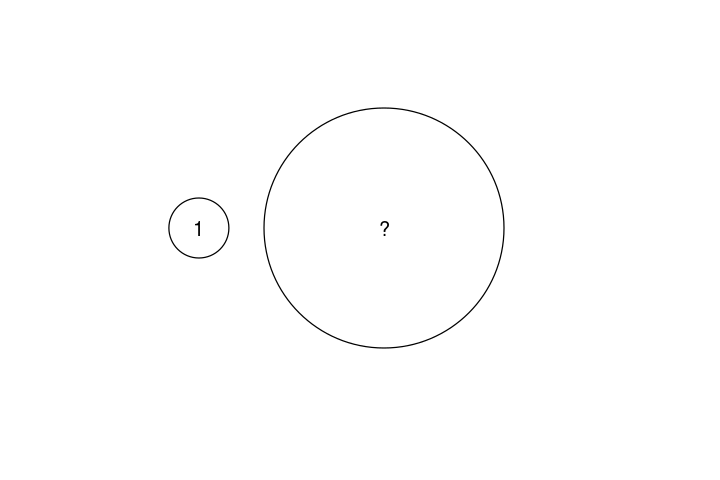

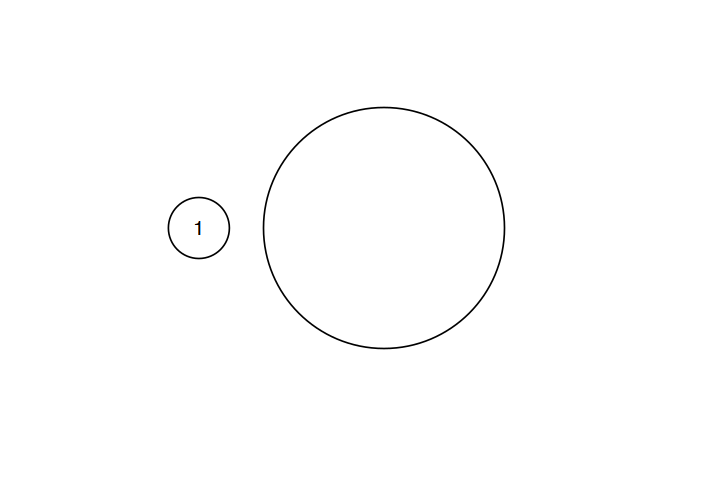

In [12]:
symbols(x=c(3, 10), y=c(0, 0), circles=c(1, 4), xlim=c(0, 20),
        xaxt="n", yaxt="n", xlab="", ylab="", bty="n")
text(3, 0, labels="1")

## Facets
We already saw how to add a third variable to a scatter plot by using a color aesthetics. **Facets** provide another way to stratify plots by additional variables. Let's look at responses to:
    
    AGE.    What is your age?
    Q44b.	Do you have a close friend or family member who is gay? 

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message:
“Removed 33 rows containing non-finite values (stat_boxplot).”

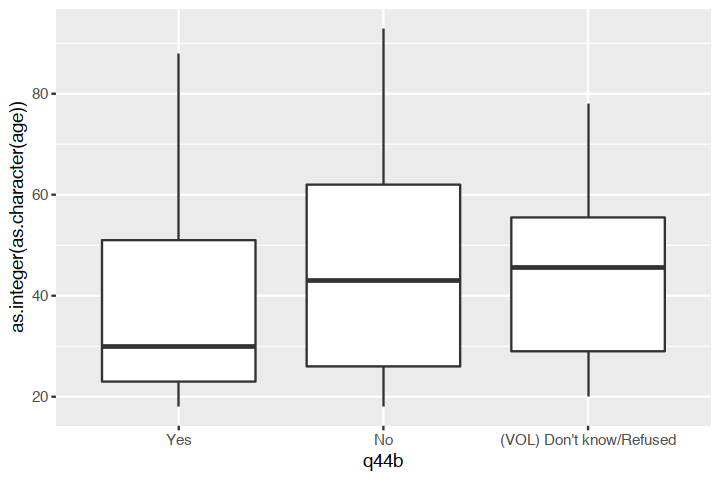

In [68]:
# print(mil$age[1:5])
# print(as.character(mil$age)[1:5])
# print(as.integer(as.character(mil$age))[1:5])
ggplot(mil) + geom_boxplot(aes(x=q44b, y=as.integer(as.character(age))))

Let's add to this the responses to another question:

    Q44i.	Have you ever placed your cell phone on or right next 
            to your bed while sleeping?

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message:
“Removed 33 rows containing non-finite values (stat_boxplot).”

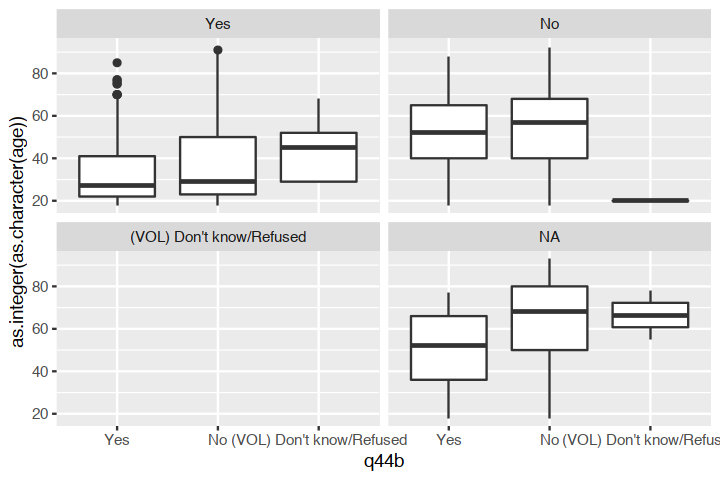

In [77]:
ggplot(mil) + geom_boxplot(aes(x=q44b, y=as.integer(as.character(age)))) + facet_wrap(~ q44i)

How can we improve the appearance of this plot?

The ``facet_wrap()`` command here told ggplot to generate a separate plot for each level of the discrete variable **class**. It also went ahead and arranged them into a nice 2x2 grid format.

The syntax to facet may look a little funny: 
```{r}
facet_wrap(~ q44i)
```
The tilde (``~``) at the beginning denotes what is called a **formula** in R. We will discuss formulas later in the class when we talk about modeling. For now, just keep in mind that the facet command must be written just so for things to work:

## The overall `ggplot` syntax
Now you have learned about all elements of the following ggplot template:

```r
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

## Labeling and titling
Adding labels and titles is extremely important when publishing plots. An uninterpretable plot is worse than no plot at all!
![bad plot](https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/mykland_fig1.jpg)
<caption> (Actual plot from a paper in a respected statistics journal.)</caption>
<small>Source: <a href="https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/">https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/</a></small>

("Exercise": reproduce this plot. For fun on your own time.)

### Exercise
Add appropriate axis and title labels to the plot. (*Hint*: `??ggplot2::title` if you don't know the commands to do this.)
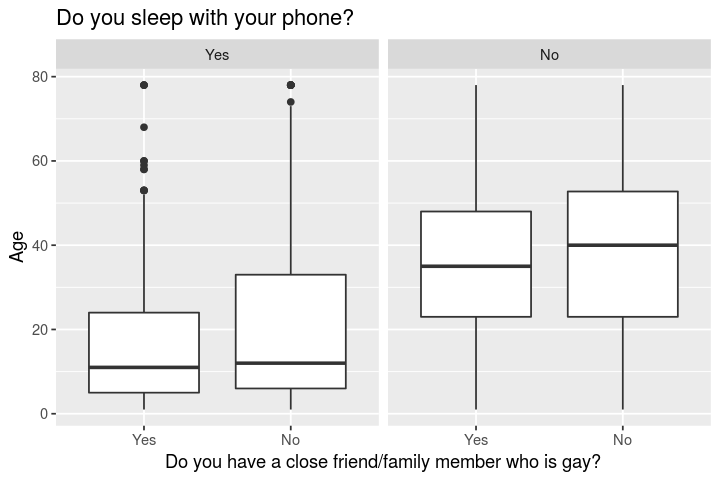

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message:
“Removed 26 rows containing non-finite values (stat_boxplot).”

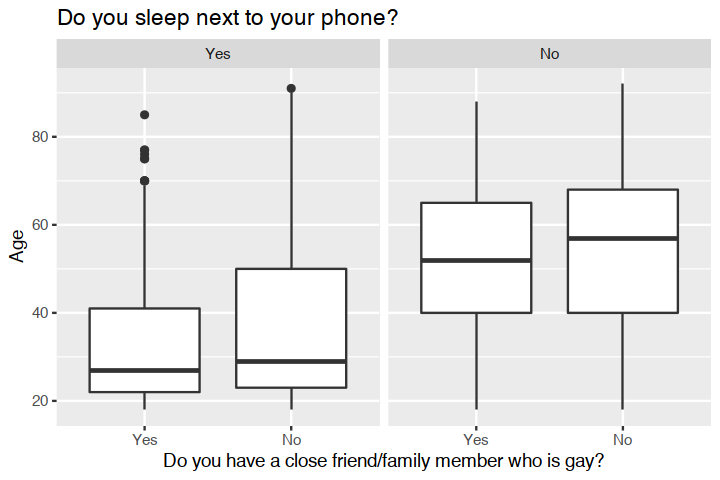

In [88]:
ggplot(filter(mil, q44b == "Yes" | q44b == "No", q44i == "Yes" | q44i == "No")) + 
    geom_boxplot(aes(x=q44b, y=as.integer(as.character(age)))) + 
    facet_wrap(~ q44i) + xlab("Do you have a close friend/family member who is gay?") + 
    ylab("Age") + ggtitle("Do you sleep next to your phone?")

## Other interesting questions
Here are all the question definitions in this data set: (see notes). Create an interesting plot and post to Slack.


    Q.8	Please tell me how important each is to you personally.
	a.	Being successful in a high-paying career or profession 
	b.	Having a successful marriage 
	c.	Living a very religious life 
	d.	Being a good parent 
	e.	Having lots of free time to relax or do things you want to do 
	f.	Becoming famous 
	g.	Helping other people who are in need 
	h.	Owning your own home 

    Q.20	How often do you visit the social networking site you use most often.
    
    Q.25 	Thinking about the past 24 hours, about how many text messages did you send and receive on your cell phone? 

    Q.36	How closely do you watch the amount of money you spend?
    
    Q. 41   Do you strongly favor, favor, oppose, or strongly oppose allowing gay and lesbian couples to marry legally?
    
    Q.44	
        a.	Do you recycle paper, plastic or glass from home? 
        b.	Do you have a close friend or family member who is gay? 
        c.	Do you happen to have any guns, rifles or pistols in your home? 
        d.	Have you ever posted a video of yourself online? 
        g.	Have you ever sent or received a text message while driving?
        i.	Have you ever placed your cell phone on or right next to your bed while sleeping?
    
    Q.46	How many tattoos do you have?
    
    HOME2	Do you own your home, rent, live in a dorm or live with your parents?
    LWP2 	Have you ever lived together with a partner without being married, or not?
    HEALTH	Are you, yourself, now covered by any form of health insurance or health plan or are you not covered at this time?
    FINAN	Do you depend on your parents or other family members for financial assistance, or not? 
    EDUC	What is the last grade or class that you completed in school? 
    AGE     How old are you?

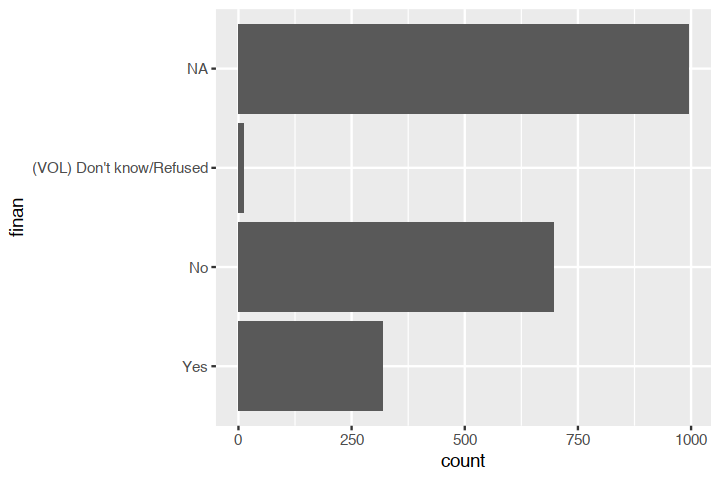

In [96]:
ggplot(mil) + geom_bar(aes(x=finan)) + coord_flip()

## My Contribution
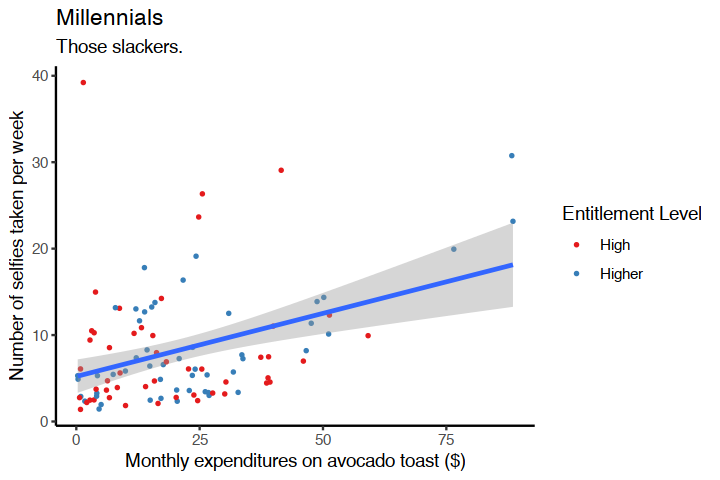

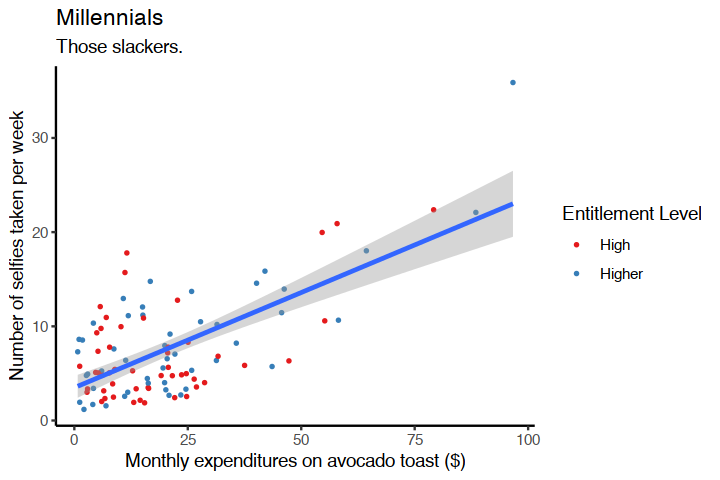

In [16]:
tibble(x = 20 * rexp(n=100), y = 2 ^ (x / 20) + 5 * rexp(n = 100),
       `Entitlement Level`=sample(c("High", "Higher"), size=100, replace=T)) %>% 
    ggplot(aes(x=x, y=y)) + 
    geom_point(aes(color=`Entitlement Level`), size=.5)  +
    ylab("Number of selfies taken per week") + 
    xlab("Monthly expenditures on avocado toast ($)") +
    geom_smooth(method="lm") +
    labs(title = "Millennials", subtitle = "Those slackers.") + theme_classic() +
    scale_color_brewer(palette="Set1")

## Scale transformations
Almost all of the plots we've seen so far have been in *Cartesian coordinates*: moving along the $x$ or $y$ axis a given distance corresponds to a proportional increase in the respective variable.

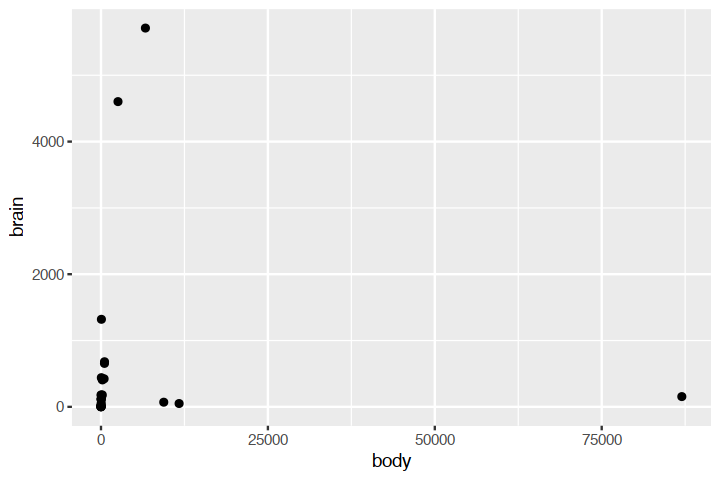

In [17]:
ggplot(MASS::Animals, aes(x = body, y = brain)) + geom_point()

Going *up* by two grid cells adds 4000 to `brain`. Going *right* by two grid cells adds 25k to `body`.

Now consider these data plotted on a log scale:

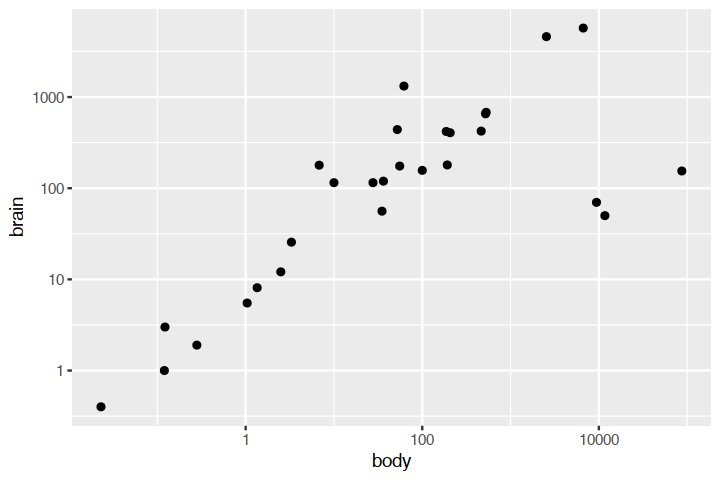

In [18]:
ggplot(MASS::Animals, aes(x = body, y = brain)) + 
    geom_point() + scale_x_log10() + scale_y_log10()

Going *up* by two cells multiplies `brain` by 100. Going right by 2 cells multiplies `body` by 100. (This is equivalent to *adding* two to $\log_{10}(\texttt{body})$, etc.)